In [1]:
from array import array
import numpy as np
import math

In [2]:
# Initial Conditions
speed = 50.0
theta = 45.0
y1 = 2.0


# Other constants
grav = 9.81 # gravitional acceleration
Pi = math.pi

In [3]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(-grav)

In [4]:
tau = 0.2 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
time = array('d')
timeNoAir = array('d')

In [5]:
endtime = 0
nelements = 0
for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    t = (iStep-1)*tau
    timeNoAir.append(t)
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    accel[0]=0.0
    accel[1]=-1.0*grav
    
    # Euler Method
    r[0] = r[0] + tau*v[0]
    r[1] = r[1] + tau*v[1]
    v[0] = v[0] + tau*accel[0]
    v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]    
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    
    # MidPoint Method
    # vxnew = v[0] + tau*accel[0]
    # vynew = v[1] + tau*accel[1]
    # r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    # r[1] = r[1] + tau*(v[1] + vynew)/2.0
    # v[0] = vxnew
    # v[1] = vynew
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    time.append(tau*(iStep-1))
    
    if (r[1] < 0):
        xplot.append(r[0])
        yplot.append(r[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
max_y = np.amax(yplot)+1
max_x = np.amax(xplot)+1
max_t = np.amax(time)+1

print ("Maximum range is %f meters." % r[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % (max_t-1))
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

print ("Max y = %f" % (max_y-1))
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 268.700577 meters.
Theory maximum range is 254.841998 meters.
 
Time of flight is 7.600000 seconds.
Theory time of flight is 7.208020 seconds.
 
Max y = 69.249888
Theory Max y = 63.710499
 
Number of elements = 38


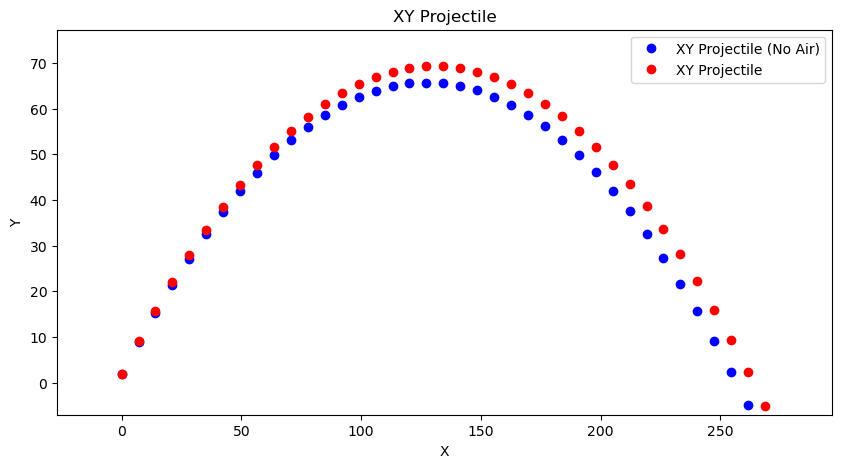

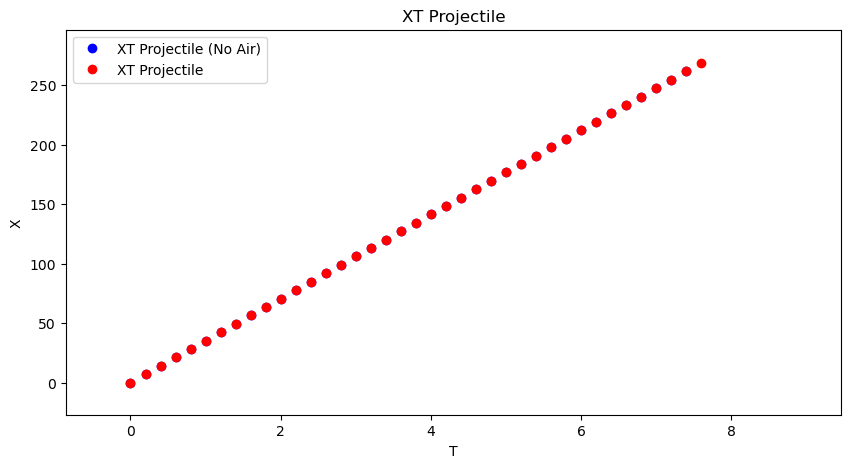

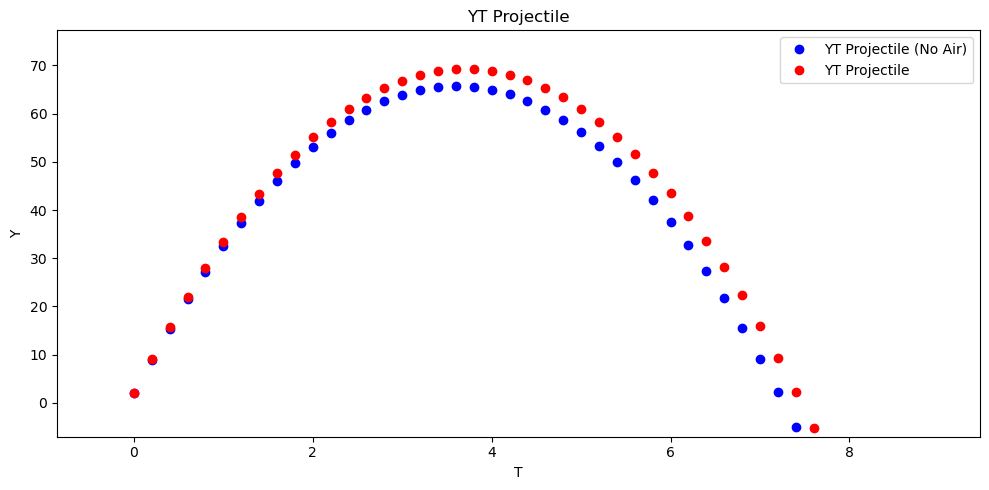

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, and YT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xNoAir, yNoAir, 'bo', label='XY Projectile (No Air)')
ax1.plot(xplot, yplot, 'ro', label='XY Projectile')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(-0.1 * max_x, 1.1 * max_x)
ax1.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax1.legend()

# Plot the XT projectile data
ax2.plot(timeNoAir, xNoAir, 'bo', label='XT Projectile (No Air)')
ax2.plot(time, xplot, 'ro', label='XT Projectile')
ax2.set_title('XT Projectile')
ax2.set_xlabel('T')
ax2.set_ylabel('X')
ax2.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax2.set_ylim(-0.1 * max_x, 1.1 * max_x)
ax2.legend()

# Plot the YT projectile data
ax3.plot(timeNoAir, yNoAir, 'bo', label='YT Projectile (No Air)')
ax3.plot(time, yplot, 'ro', label='YT Projectile')
ax3.set_title('YT Projectile')
ax3.set_xlabel('T')
ax3.set_ylabel('Y')
ax3.set_xlim(-0.1 * max_t, 1.1 * max_t)
ax3.set_ylim(-0.1 * max_y, 1.1 * max_y)
ax3.legend()

# Show the plots
plt.tight_layout()
plt.show()